In [5]:
import torch
import torchvision
import torchvision.transforms as transforms 

In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root = './data', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=4, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', download=True, train=False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, shuffle=True, batch_size=4, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


bird
cat
ship
ship


torch.Size([4, 3, 32, 32])

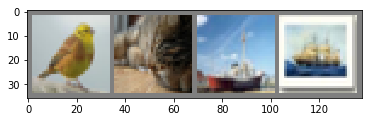

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) ###

detaiter = iter(trainloader) ###
images, labels = detaiter.next()

imshow(torchvision.utils.make_grid(images))

for j in range(4):
    print(classes[labels[j]])
images.size()

In [28]:
import torch.nn as nn
import torch.nn.functional as F

In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [30]:
import torch.optim as optim

#defining loss function 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [65]:
# training
for epoch in range(2):
    running_loss=0.0
    for i, data in enumerate(trainloader, 0): ###
        inputs, labels = data
        optimizer.zero_grad() ###

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d, %5d] loss: %.5f' % (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0
        
print('Finished Training')

[1,  2000] loss: 0.00035
[1,  4000] loss: 0.00127
[1,  6000] loss: 0.00034
[1,  8000] loss: 0.00039
[1, 10000] loss: 0.00056
[1, 12000] loss: 0.00028
[2,  2000] loss: 0.00008
[2,  4000] loss: 0.00028
[2,  6000] loss: 0.00037
[2,  8000] loss: 0.00014
[2, 10000] loss: 0.00014
[2, 12000] loss: 0.00025
Finished Training


Groundtruth:   deer plane  frog horse


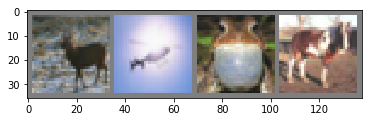

In [66]:
detaiter = iter(testloader)
images, labels = detaiter.next()

imshow(torchvision.utils.make_grid(images))
print('Groundtruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [67]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   deer plane  frog horse


In [68]:
total = 0
correct = 0
with torch.no_grad():
    for data in testloader:
        inputs , labels = data
        outputs = net(inputs)
        total += labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted==labels).sum().item()
print('accuracy of network on 10000 test images: %d ' % (100*correct/total))

accuracy of network on 10000 test images: 56 


In [69]:
x = torch.tensor([2, 3, 4, 5])
y = torch.tensor([2, 5, 6, 8])
print((x==y).squeeze())

tensor([1, 0, 0, 0], dtype=torch.uint8)


In [70]:
# checking class-wise accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs,1)
        c = (predicted==labels).squeeze()
        for j in range(4):
            label = labels[j]
            class_total[label] += 1
            class_correct[label] += c[j].item()
            
for i in range(10):
    print("Accuracy of %5s: %2d" % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane: 65
Accuracy of   car: 74
Accuracy of  bird: 42
Accuracy of   cat: 38
Accuracy of  deer: 50
Accuracy of   dog: 43
Accuracy of  frog: 70
Accuracy of horse: 62
Accuracy of  ship: 62
Accuracy of truck: 60


In [ ]:
# ACCURACY WITH 100 EPOCHS - 56%
# ACCURACY WITH 20 EPOCHS - 60%
# ACCURACY WITH 2 EPOCHS - 54%